___
# Ciência dos Dados - PROJETO 1

## Sabrina Machado Bezerra
___

## Quem assiste mais TV, solteiros, casais ou famílias??


___
## Introdução

Eu pretendo analisar com a minha pesquisa pessoas de 3 diferentes perfis: solteiros, casados e famílias (considerando que pessoas que moram sozinhas são solteiras, duas pessoas que moram na mesma casa são casadas e três ou mais pessoas que moram na mesma casa são uma família), e quem entre eles assiste mais televisão. Note que assumo que quem assiste mais televisão tem melhor qualidade da mesma.

___
## Análise e Resultados

Antes da nossa análise vamos filtrar as variáveis que iremos usar, tirar os outliers e trocar os 'NaN's por 0. Normalmente, ao invés de substituir os Nans por 0 simplesmente os retiraríamos, mas nesse caso, tirá-los afetaria a análise negativamente, pois dados úteis para outras questões não seriam considerados. Já quando estivermos trabalhando com renda, que seria o único momento em que deixar os Nan's afetaria a análise, obteremos uma conclusão semelhante.

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [43]:
dados = pd.read_csv("DOM2015.csv")
df1 = dados[['V0105','V0106','V0226','V0227','V02270','V02271','V02272','V02273','V02274','V4621']]
df1.to_csv('Projeto1_Aps1.csv',sep=";")
df1 = df1.fillna(0)

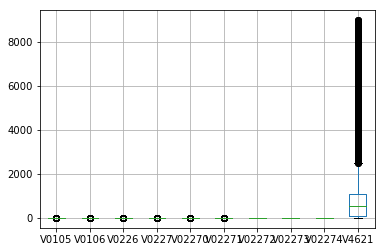

In [44]:
renda = df1[(df1.V4621< 9000)]
renda.boxplot()
plt.show()

Agora ja com o dataframe filtrado, vamos criar funcoes que geram novas variaveis e aplica-las em seguida.

In [45]:
def Nota_TV(df):
    Q=1
    if (df['V02272'])==1:
        Q=3
    elif (df['V02273'])==1:
        Q=2
    if (df['V0227'])==1:
        Q=Q/2
    return (((df['V02270'])*2+(df['V02271']))*Q)/df['V0105']

def faixasph(df):
    x=df['V4621']
    if x<500: return 1
    elif x<1000: return 2
    elif x<1500: return 3
    elif x<2000: return 4
    return 6

def EC(df):
    if df['V0105'] >= 3:
        return 3
    return df['V0105']

def QualiTV(df):
    x=df['TV']
    if x<1: return 1
    elif x<3: return 2
    elif x<7: return 3
    elif x<12: return 4
    return 5


In [46]:
df2 = df1.apply(Nota_TV,axis=1)
df1["TV"] = df2

faixas=df1.apply(faixasph,axis=1)
df1['faixas']=faixas

EC = df1.apply(EC, axis=1)
df1["EC"] = EC
df1 = df1[df1.EC > 0] 

df2 = df1.apply(QualiTV,axis=1)
df1['TV'] = df2

/Users/sabrina/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


In [47]:
EC = df1["EC"].astype('category')
EC.cat.categories = (['Solteiro','Casado','Familia'])

TV = df2.astype('category')
TV.cat.categories = (['Pessimo','Ruim','Media', 'Boa', 'Excelente'])

O próximo passo é cruzar as variáveis de Perfil e Qualidade de TV (que foram categorizadas na célula acima).

Qualidade de TV,Pessimo,Ruim,Media,Boa,Excelente
Quantidade de pessoas,,,,,
Solteiro,0.062003,0.546105,0.322734,0.039746,0.029412
Casado,0.123212,0.379905,0.450312,0.042538,0.004034
Familia,0.151970,0.428035,0.404717,0.015277,0.000000


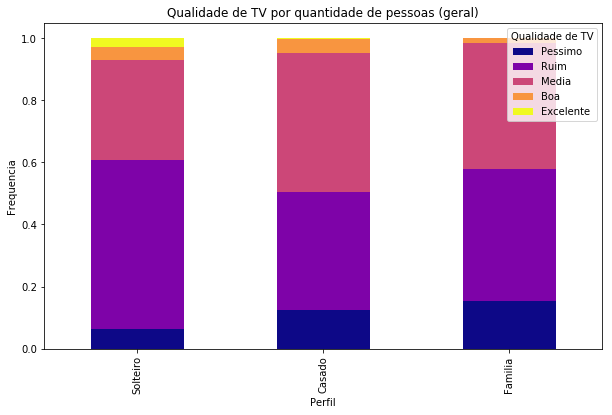

In [72]:
df3 = pd.crosstab(EC, TV, rownames = ['Quantidade de pessoas'], colnames =['Qualidade de TV'],normalize="index")
plot1 = df3.plot(kind='bar',title='Qualidade de TV por quantidade de pessoas (geral)',stacked=True,figsize=(10, 6),colormap='plasma')
plt.ylabel('Frequencia')
plt.xlabel('Perfil')
df3

A partir do gráfico e da tabela acima, não podemos perceber uma diferença de comportamento relevante entre os perfis. 

Quantidade de pessoas,Solteiro,Casado,Familia
Qualidade de TV,,,
Pessimo,0.147309,0.317280,0.535411
Ruim,0.342900,0.258548,0.398553
Media,0.228732,0.345915,0.425352
Boa,0.366300,0.424908,0.208791
Excelente,0.870588,0.129412,0.000000


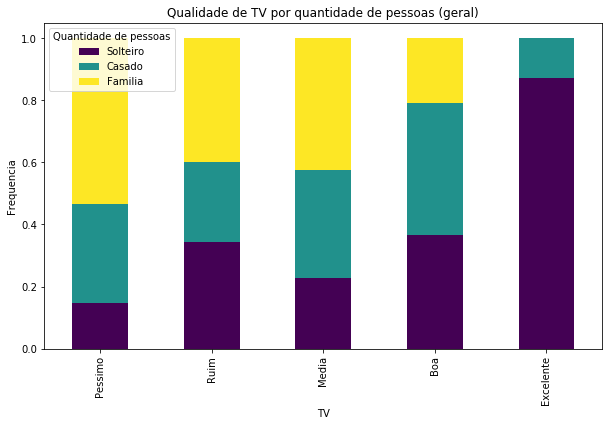

In [66]:
df3 = pd.crosstab(EC, TV, rownames = ['Quantidade de pessoas'], colnames =['Qualidade de TV'],normalize="columns").T
plot1 = df3.plot(kind='bar',title='Qualidade de TV por quantidade de pessoas (geral)',stacked=True,figsize=(10, 6),colormap='viridis')
plt.ylabel('Frequencia')
plt.xlabel('TV')
df3

O gráfico acima nos leva a conclusão de que pessoas com melhor qualidade de TV tendem a ser solteiras.

___
Agora vamos observar se este comportamento se estende em diferentes contextos socias economicos dividindo a populacao em quatro faixas de renda.

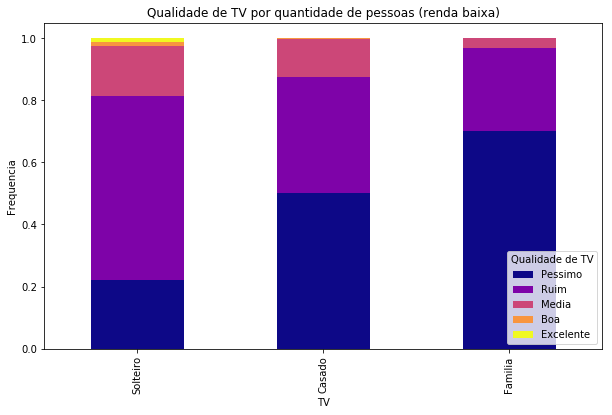

In [68]:
df100 = df1[(df1.faixas == 1)]

EC = df100["EC"]
TV = df100["TV"]

EC = df100["EC"].astype('category')
EC.cat.categories = (['Solteiro','Casado','Familia'])

TV = df100["TV"].astype('category')
TV.cat.categories = (['Pessimo','Ruim','Media', 'Boa', 'Excelente'])

df3 = pd.crosstab(EC, TV, rownames = ['Quantidade de pessoas'], colnames =['Qualidade de TV'],normalize="index")
plot1 = df3.plot(kind='bar',title='Qualidade de TV por quantidade de pessoas (renda baixa)',stacked=True,figsize=(10, 6),colormap='plasma')
plt.ylabel('Frequencia')
plt.xlabel('TV')
plt.show()

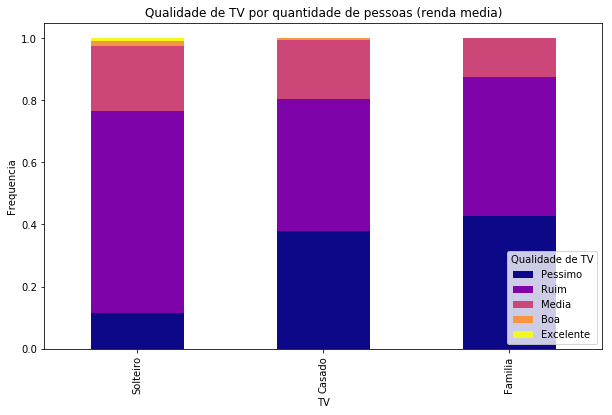

In [69]:
df100 = df1[(df1.faixas == 2)]

EC = df100["EC"]
TV = df100["TV"]

EC = df100["EC"].astype('category')
EC.cat.categories = (['Solteiro','Casado','Familia'])

TV = df100["TV"].astype('category')
TV.cat.categories = (['Pessimo','Ruim','Media', 'Boa', 'Excelente'])

df3 = pd.crosstab(EC, TV, rownames = ['Quantidade de pessoas'], colnames =['Qualidade de TV'],normalize="index")
plot1 = df3.plot(kind='bar',title='Qualidade de TV por quantidade de pessoas (renda media)',stacked=True,figsize=(10, 6),colormap='plasma')
plt.ylabel('Frequencia')
plt.xlabel('TV')
plt.show()

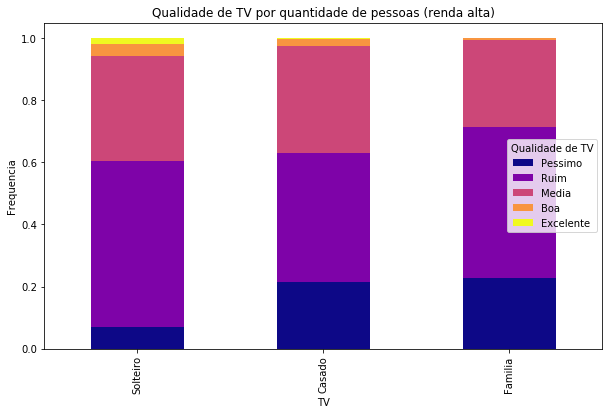

In [70]:
df100 = df1[(df1.faixas == 3)]

EC = df100["EC"]
TV = df100["TV"]

EC = df100["EC"].astype('category')
EC.cat.categories = (['Solteiro','Casado','Familia'])

TV = df100["TV"].astype('category')
TV.cat.categories = (['Pessimo','Ruim','Media', 'Boa', 'Excelente'])

df3 = pd.crosstab(EC, TV, rownames = ['Quantidade de pessoas'], colnames =['Qualidade de TV'],normalize="index")
plot1 = df3.plot(kind='bar',title='Qualidade de TV por quantidade de pessoas (renda alta)',stacked=True,figsize=(10, 6),colormap='plasma')
plt.ylabel('Frequencia')
plt.xlabel('TV')
plt.show()

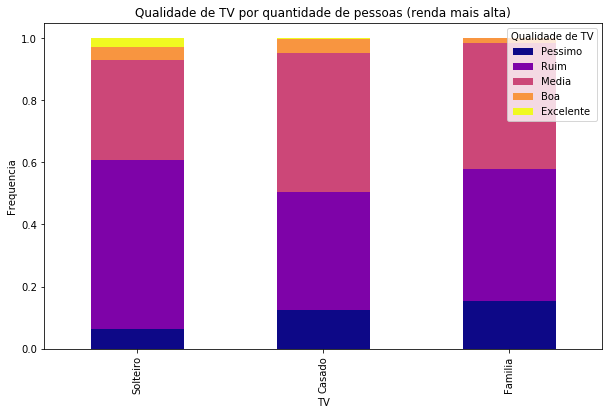

In [71]:
df100 = df1[(df1.faixas == 4)]

EC = df100["EC"]
TV = df100["TV"]

EC = df100["EC"].astype('category')
EC.cat.categories = (['Solteiro','Casado','Familia'])

TV = df100["TV"].astype('category')
TV.cat.categories = (['Pessimo','Ruim','Media', 'Boa', 'Excelente'])

df3 = pd.crosstab(EC, TV, rownames = ['Quantidade de pessoas'], colnames =['Qualidade de TV'],normalize="index")
plot1 = df3.plot(kind='bar',title='Qualidade de TV por quantidade de pessoas (renda mais alta)',stacked=True,figsize=(10, 6),colormap='plasma')
plt.ylabel('Frequencia')
plt.xlabel('TV')
plt.show()

___
## Conclusão 

Com os gráficos acima podemos perceber que existe sim uma diferença entre os perfis, mesmo que pequena, indicando que os solteiros assistem um pouco mais de TV, e que essa diferença vai diminuindo conforme a renda aumenta. Lembrando que inferimos que uma pessoa com melhor qualidade de TV assiste mais TV e vice-versa.
